In [2]:
import daft
from matplotlib import rc

rc("font", family="serif", size=12)
rc("text", usetex=True)

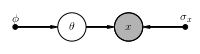

In [3]:
# Really simple solar model ...

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
pgm.add_node("Phi", r"${\phi}$", 0.5, 1, fixed=True)
pgm.add_node("Theta", r"${\theta}$", 1.5, 1)

# Data.
pgm.add_node("x", r"$x$", 2.5, 1, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x}$", 3.5, 1, fixed=True)

# Add in the edges.
pgm.add_edge("Phi", "Theta")
pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")

# Render and save.
pgm.render()
pgm.savefig("solar_pgm.pdf")
pgm.savefig("solar_pgm.png", dpi=150)

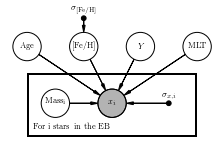

In [4]:
# Single EB max pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=True)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 1.2 * delta_y + tweak, 3.0 - 2 * tweak, upper - lower + 0.2 * delta_y],
    label=r"For i stars in the EB",
    rect_params=rect_params,
)

pgm.add_node("feh_unc", r"$\sigma_{\rm [Fe/H]}$", 3.5, upper + delta_y, fixed=True)

# Hierarchical parameters.
pgm.add_node("Age", r"Age", 2.5, upper)
pgm.add_node("feh", r"$\rm [Fe/H]$", 3.5, upper)
pgm.add_node("Y", r"$Y$", 4.5, upper)
pgm.add_node("MLT", r"MLT", 5.5, upper)

# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 3.0, lower)

# Data.
pgm.add_node("x", r"$x_{i}$", 4.0, lower, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x, i}$", 5.0, lower, fixed=True)


# Add in the edges.
pgm.add_edge("feh_unc", "feh")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")

# Render and save.
pgm.render()
pgm.savefig("eb_pgm.pdf")
pgm.savefig("eb_pgm.png", dpi=150)

In [38]:
import daft
from matplotlib import rc

# Set up font and text rendering.
rc("font", family="serif", size=8)
rc("text", usetex=False)

# Instantiate the PGM.
pgm = daft.PGM()

# Layout parameters.
upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Plate for multiple stars.
pgm.add_plate(
    [2.0, lower - delta_y, 6.0, upper - lower + 2 * delta_y],
    label=r"For $i$ stars",
    rect_params={"lw": 1.5},
)

# Global parameters.
pgm.add_node("yini", r"$Y_{\rm ini}$", 2.5, upper)
pgm.add_node("alphamlt", r"$\alpha_{\rm MLT}$", 3.5, upper)
pgm.add_node("eta", r"$\eta$", 4.5, upper)
pgm.add_node("fehini", r"$\rm [Fe/H]_{ini}$", 5.5, upper)
pgm.add_node("afe_meh", r"$\rm [\alpha/Fe]$", 6.5, upper)
pgm.add_node("meh", r"$\rm [M/H]$", 7.5, upper)
pgm.add_node("M4_age", r"$M4_{\rm age}$", 8.5, upper)

# Star-specific parameters.
pgm.add_node("massini", r"$\rm Mass_{i}$", 3.0, lower)
pgm.add_node("alphafe", r"$\rm [\alpha/Fe]_{i}$", 4.0, lower)
pgm.add_node("star_age", r"$\rm Age_{i}$", 5.0, lower)

# Outputs.
pgm.add_node("teff", r"$T_{\rm eff}$", 6.0, lower, observed=True)
pgm.add_node("lum", r"$L$", 7.0, lower, observed=True)
pgm.add_node("dnu", r"$\Delta \nu$", 8.0, lower, observed=True)
pgm.add_node("numax", r"$\nu_{\max}$", 9.0, lower, observed=True)
pgm.add_node("age", r"$\rm Age$", 10.0, lower, observed=True)

# Observational uncertainties.
pgm.add_node("teff_err", r"$\sigma_{T_{\rm eff}}$", 6.0, lower - delta_y, fixed=True)
pgm.add_node("lum_err", r"$\sigma_{L}$", 7.0, lower - delta_y, fixed=True)
pgm.add_node("dnu_err", r"$\sigma_{\Delta \nu}$", 8.0, lower - delta_y, fixed=True)
pgm.add_node("numax_err", r"$\sigma_{\nu_{\max}}$", 9.0, lower - delta_y, fixed=True)
pgm.add_node("age_err", r"$\sigma_{\rm Age}$", 10.0, lower - delta_y, fixed=True)

# Dependencies between global parameters and star-specific parameters.
pgm.add_edge("yini", "X")
pgm.add_edge("alphamlt", "X")
pgm.add_edge("eta", "X")
pgm.add_edge("fehini", "meh")
pgm.add_edge("afe_meh", "meh")
pgm.add_edge("meh", "X")

# Dependencies between star-specific parameters and outputs.
pgm.add_edge("massini", "X")
pgm.add_edge("alphafe", "X")
pgm.add_edge("star_age", "X")

# Dependencies for observation errors.
pgm.add_edge("X", "X_err")

# Render and save.
pgm.render()
pgm.savefig("bmodel_pgm.pdf")
pgm.savefig("bmodel_pgm.png", dpi=150)


KeyError: 'X'

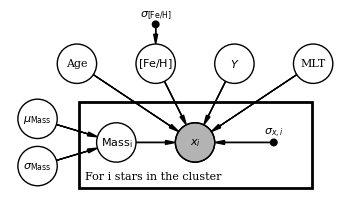

In [4]:
# Cluster max pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=False)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 1.2 * delta_y + tweak, 3.0 - 2 * tweak, upper - lower + 0.2 * delta_y],
    label=r"For i stars in the cluster",
    rect_params=rect_params,
)

pgm.add_node("feh_unc", r"$\sigma_{\rm [Fe/H]}$", 3.5, upper + delta_y, fixed=True)

# Hierarchical parameters.
pgm.add_node("Age", r"Age", 2.5, upper)
pgm.add_node("feh", r"$\rm [Fe/H]$", 3.5, upper)
pgm.add_node("Y", r"$Y$", 4.5, upper)
pgm.add_node("MLT", r"MLT", 5.5, upper)

pgm.add_node('Mumass', r'$\mu_{\rm Mass}$', 2.0, lower+0.3)
pgm.add_node('Smass', r'$\sigma_{\rm Mass}$', 2.0, lower-0.3)

# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 3.0, lower)

# Data.
pgm.add_node("x", r"$x_{i}$", 4.0, lower, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x, i}$", 5.0, lower, fixed=True)


# Add in the edges.
pgm.add_edge("feh_unc", "feh")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")
pgm.add_edge("Mumass", "Mass")
pgm.add_edge("Smass", "Mass")

# Render and save.
pgm.render()
pgm.savefig("cluster_pgm.pdf")
pgm.savefig("cluster_pgm.png", dpi=150)

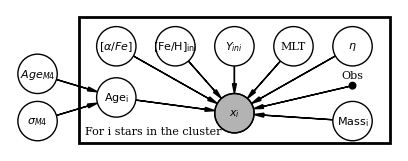

In [54]:
# Cluster max pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=False)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3.5
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 1.2 * delta_y + tweak, 4.0 - 2 * tweak, upper - lower + 0.2 * delta_y],
    label=r"For i stars in the cluster",
    rect_params=rect_params,
)

# Hierarchical parameters.
#pgm.add_node("M4_Age", r"M4 Age", 2.0, upper)
pgm.add_node("feh", r"$\rm [Fe/H]_{ini}$", 3.75, lower+0.65)
pgm.add_node("Y", r"$Y_{ini}$", 4.5, lower+0.65)
pgm.add_node("MLT", r"MLT", 5.25, lower+0.65)
pgm.add_node("Eta", r"$\eta$", 6.0, lower+0.65)

pgm.add_node('M4_Age', r"$Age_{M4}$", 2.0, lower+0.3)
pgm.add_node('Spread', r'$\sigma_{M4}$', 2.0, lower-0.3)

# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 6.0, lower-0.3)
pgm.add_node("Age", r"$\rm Age_{i}$", 3.0, lower)
pgm.add_node("alphafe", r"$[\alpha/Fe]$", 3.0, lower+0.65)


# Data.
pgm.add_node("x", r"$x_{i}$", 4.5, lower-0.2, observed=True)
pgm.add_node("x_unc", r"Obs", 6.0, lower+0.15, fixed=True)


# Add in the edges.
pgm.add_edge("Eta", "x")
pgm.add_edge("alphafe", "x")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")
pgm.add_edge("M4_Age", "Age")
pgm.add_edge("Spread", "Age")

# Render and save.
pgm.render()
pgm.savefig("cluster_pgm.pdf")
pgm.savefig("cluster_pgm.png", dpi=150)

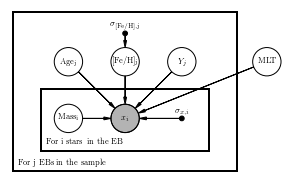

In [6]:
# Mulitple EB max pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=True)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 1.2 * delta_y + tweak, 3.0 - 2 * tweak, upper - lower + 0.2 * delta_y],
    label=r"For i stars in the EB",
    rect_params=rect_params,
)

pgm.add_plate(
    [2.0 + tweak, lower - 1.9 * delta_y + tweak, 4.0 - 2 * tweak, 1.7 + upper - lower + 0.2 * delta_y],
    label=r"For j EBs in the sample",
    rect_params=rect_params,
)

pgm.add_node("feh_unc", r"$\sigma_{\rm [Fe/H], j}$", 4.0, upper + delta_y, fixed=True)

# Hierarchical parameters.
pgm.add_node("Age", r"$\rm Age_{j}$", 3.0, upper)
pgm.add_node("feh", r"$\rm [Fe/H]_{j}$", 4.0, upper)
pgm.add_node("Y", r"$Y_{j}$", 5.0, upper)
pgm.add_node("MLT", r"MLT", 6.5, upper)

# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 3.0, lower)

# Data.
pgm.add_node("x", r"$x_{i}$", 4.0, lower, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x, i}$", 5.0, lower, fixed=True)


# Add in the edges.
pgm.add_edge("feh_unc", "feh")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")

# Render and save.
pgm.render()
pgm.savefig("heb_pgm.pdf")
pgm.savefig("heb_pgm.png", dpi=150)

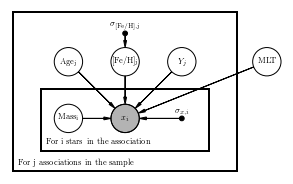

In [8]:
# AOTA max pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=True)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 1.2 * delta_y + tweak, 3.0 - 2 * tweak, upper - lower + 0.2 * delta_y],
    label=r"For i stars in the association",
    rect_params=rect_params,
)

pgm.add_plate(
    [2.0 + tweak, lower - 1.9 * delta_y + tweak, 4.0 - 2 * tweak, 1.7 + upper - lower + 0.2 * delta_y],
    label=r"For j associations in the sample",
    rect_params=rect_params,
)

pgm.add_node("feh_unc", r"$\sigma_{\rm [Fe/H], j}$", 4.0, upper + delta_y, fixed=True)

# Hierarchical parameters.
pgm.add_node("Age", r"$\rm Age_{j}$", 3.0, upper)
pgm.add_node("feh", r"$\rm [Fe/H]_{j}$", 4.0, upper)
pgm.add_node("Y", r"$Y_{j}$", 5.0, upper)
pgm.add_node("MLT", r"MLT", 6.5, upper)

# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 3.0, lower)

# Data.
pgm.add_node("x", r"$x_{i}$", 4.0, lower, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x, i}$", 5.0, lower, fixed=True)


# Add in the edges.
pgm.add_edge("feh_unc", "feh")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")

# Render and save.
pgm.render()
pgm.savefig("aota_pgm.pdf")
pgm.savefig("aota_pgm.png", dpi=150)

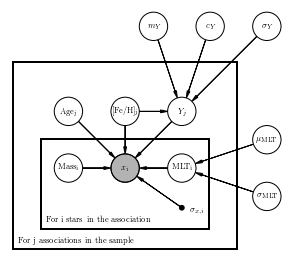

In [3]:
# Mulitple EB partial pooled model ...

rc("font", family="serif", size=8)
rc("text", usetex=True)

# Instantiate the PGM.
pgm = daft.PGM()

upper = 3
lower = 2
delta_x = 1.0
delta_y = 0.5

# Start with the plates.
tweak = 0.02
rect_params = {"lw": 2}
pgm.add_plate(
    [2.5 + tweak, lower - 2.2 * delta_y + tweak, 3.0 - 2 * tweak, 0.5 + upper - lower + 0.2 * delta_y],
    label=r"For i stars in the association",
    rect_params=rect_params,
)

pgm.add_plate(
    [2.0 + tweak, lower - 2.9 * delta_y + tweak, 4.0 - 2 * tweak, 2.2 + upper - lower + 0.2 * delta_y],
    label=r"For j associations in the sample",
    rect_params=rect_params,
)

#pgm.add_node("feh_unc", r"$\sigma_{\rm [Fe/H], j}$", 4.0, upper + delta_y, fixed=True)

# Top level MLT
pgm.add_node("mu_mlt", r"$\mu_{\rm MLT}$", 6.5, upper-0.5)
pgm.add_node("sigma_mlt", r"$\sigma_{\rm MLT}$", 6.5, upper-1.5)

pgm.add_node('mY', r'$m_{Y}$', 4.5, upper+1.5)
pgm.add_node('cY', r'$c_{Y}$', 5.5, upper+1.5)
pgm.add_node('sY', r'$\sigma_{Y}$', 6.5, upper+1.5)

# Hierarchical parameters.
pgm.add_node("Age", r"$\rm Age_{j}$", 3.0, upper)
pgm.add_node("feh", r"$\rm [Fe/H]_{j}$", 4.0, upper)
pgm.add_node("Y", r"$Y_{j}$", 5.0, upper)


# By star parameters
pgm.add_node("Mass", r"$\rm Mass_{i}$", 3.0, lower)
pgm.add_node("MLT", r"$\rm MLT_{i}$", 5.0, lower)

# Data.
pgm.add_node("x", r"$x_{i}$", 4.0, lower, observed=True)
pgm.add_node("x_unc", r"$\sigma_{x, i}$", 5.0, lower - 0.7, 
             fixed=True, offset=[15.0, -10.0])


# Add in the edges.
#pgm.add_edge("feh_unc", "feh")
pgm.add_edge("Mass", "x")
pgm.add_edge("Age", "x")
pgm.add_edge("feh", "x")
pgm.add_edge("Y", "x")
pgm.add_edge("MLT", "x")
#pgm.add_edge("Theta", "x")
pgm.add_edge("x_unc", "x")
pgm.add_edge("mu_mlt", "MLT")
pgm.add_edge("sigma_mlt", "MLT")

pgm.add_edge("mY", "Y")
pgm.add_edge("cY", "Y")
pgm.add_edge("sY", "Y")
pgm.add_edge('feh', 'Y')


# Render and save.
pgm.render()
pgm.savefig("hebp_pgm.pdf")
pgm.savefig("hebp_pgm.png", dpi=150)